In [45]:
from typing import Callable
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms.functional as VF

In [82]:
def sdf_sphere(pos: torch.Tensor, radius: float = 1.) -> torch.Tensor:
    dot = pos[:, 0] * pos[:, 0] + pos[:, 1] * pos[:, 1] + pos[:, 2] * pos[:, 2]
    return torch.sqrt(dot) - radius #+ torch.sin(pos[:, 0] * 10.) * .1

# sdf_sphere(torch.Tensor([[.5,.5,0], [1,0,0]]))

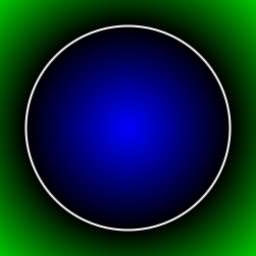

In [83]:
def render_sdf_grid(sdf: Callable, size: int = 256, space: float = 1.25, edge_width: float = 0.02):
    grid = torch.linspace(-space, space, size).reshape(size, 1).expand(size, -1, 3).clone()
    grid[:,:,1] = torch.linspace(-space, space, size).reshape(size, 1).expand(-1, size)
    grid[:,:,2] = 0.
    
    dist = sdf(grid.reshape(size*size, 3)).reshape(size, size)
    rgb = torch.clamp(1.-torch.abs(dist) / edge_width, 0, 1).repeat(3, 1, 1)
    rgb[1,:,:] += torch.clamp(dist / 1., 0, 1)
    rgb[2,:,:] += torch.clamp(dist / -1., 0, 1)
    return VF.to_pil_image(rgb)

render_sdf_grid(sdf_sphere)